# Description

This notebook includes the code for collecting from Hugging Face.

GitHub documentation: https://github.com/huggingface/hub-docs/blob/main/docs/hub/api.md

To scrape everything we need will require me to buy a licence for 9 USD/month https://github.com/huggingface/hub-docs/blob/main/docs/api-inference/rate-limits.md

# 1. Collecting information on models

## 1.1 Model cards

Each model has a model card, which includes basic information about the model.

What can be collected:
- **Description of the model**. The description can vary across models and its quality will depend on how much effort the model creator decided to put into it.
- **Model tree** - the models that are related to the focal model either as the foundational model that the focal model was built on or as the fine-tuned model that was built using the focal model as the foundational model.
- **Dataset** - the dataset that was used to fine-tune the focal model.
- **Libraries** - software packages used to create the model.
- **License** - license that determines how the model can be used by others.

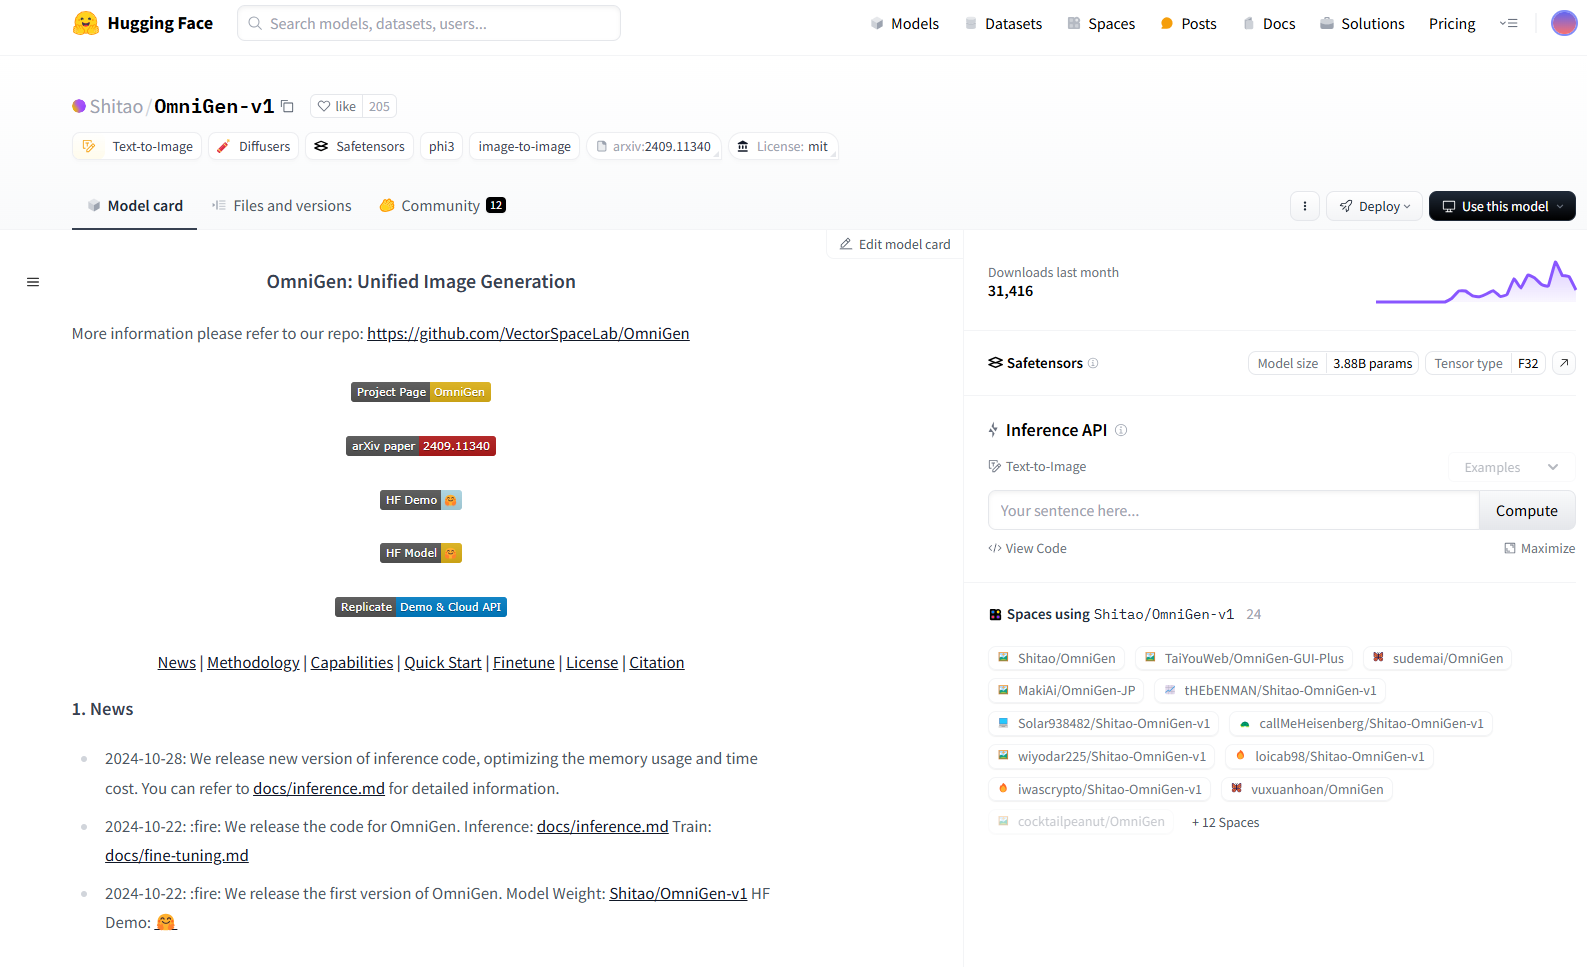

In [18]:
# https://huggingface.co/docs/huggingface_hub/en/guides/model-cards

from huggingface_hub import ModelCard

card = ModelCard.load('nvidia/Llama-3.1-Nemotron-70B-Instruct-HF')

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

C:\Users\Patrick\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Patrick\.cache\huggingface\hub\models--nvidia--Llama-3.1-Nemotron-70B-Instruct-HF. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [20]:
 
# Returns the text of the card, **excluding** the metadata header.
card.text

'# Model Overview\n\n## Description:\n\nLlama-3.1-Nemotron-70B-Instruct is a large language model customized by NVIDIA to improve the helpfulness of LLM generated responses to user queries.\n\n\nThis model reaches [Arena Hard](https://github.com/lmarena/arena-hard-auto) of 85.0, [AlpacaEval 2 LC](https://tatsu-lab.github.io/alpaca_eval/) of 57.6 and [GPT-4-Turbo MT-Bench](https://github.com/lm-sys/FastChat/pull/3158) of 8.98, which are known to be predictive of [LMSys Chatbot Arena Elo](https://huggingface.co/spaces/lmsys/chatbot-arena-leaderboard)\n\nAs of 1 Oct 2024, this model is #1 on all three automatic alignment benchmarks (verified tab for AlpacaEval 2 LC), edging out strong frontier models such as GPT-4o and Claude 3.5 Sonnet.\n\nAs of Oct 24th, 2024 the model has Elo Score of 1267(+-7), rank 9 and style controlled rank of 26 on [ChatBot Arena leaderboard](https://lmarena.ai/?leaderboard).\n\nThis model was trained using RLHF (specifically, REINFORCE), [Llama-3.1-Nemotron-70B-R

In [22]:
# Returns a ModelCardData instance with the model card’s metadata. Call .to_dict() on this instance to get the representation as a dictionary
card.data

{'base_model': 'meta-llama/Llama-3.1-70B-Instruct', 'datasets': ['nvidia/HelpSteer2'], 'eval_results': None, 'language': ['en'], 'library_name': 'transformers', 'license': 'llama3.1', 'license_name': None, 'license_link': None, 'metrics': None, 'model_name': None, 'pipeline_tag': 'text-generation', 'tags': ['nvidia', 'llama3.1'], 'inference': False, 'fine-tuning': False}

In [24]:
# Returns the text content of the card, **including** the metadata header.
card.content

'---\nbase_model: meta-llama/Llama-3.1-70B-Instruct\ndatasets:\n- nvidia/HelpSteer2\nlanguage:\n- en\nlibrary_name: transformers\nlicense: llama3.1\npipeline_tag: text-generation\ntags:\n- nvidia\n- llama3.1\ninference: false\nfine-tuning: false\n---\n# Model Overview\n\n## Description:\n\nLlama-3.1-Nemotron-70B-Instruct is a large language model customized by NVIDIA to improve the helpfulness of LLM generated responses to user queries.\n\n\nThis model reaches [Arena Hard](https://github.com/lmarena/arena-hard-auto) of 85.0, [AlpacaEval 2 LC](https://tatsu-lab.github.io/alpaca_eval/) of 57.6 and [GPT-4-Turbo MT-Bench](https://github.com/lm-sys/FastChat/pull/3158) of 8.98, which are known to be predictive of [LMSys Chatbot Arena Elo](https://huggingface.co/spaces/lmsys/chatbot-arena-leaderboard)\n\nAs of 1 Oct 2024, this model is #1 on all three automatic alignment benchmarks (verified tab for AlpacaEval 2 LC), edging out strong frontier models such as GPT-4o and Claude 3.5 Sonnet.\n\nA

## 1.2 Model Tree & general information

Description:
Model trees are a list of ML models that build on the focal model. For example, someone may use Meta's Lama model as the base model and then fine-tune the model on their own data to improve the models on a more specialised task.
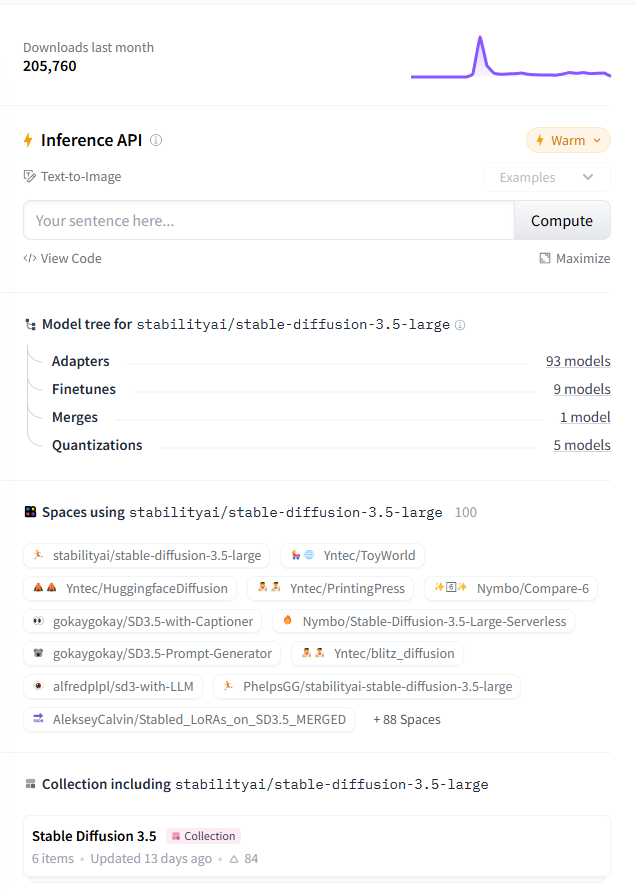

In [131]:
"""
This code retrieves general information on all the models. One part of it is which models the focal model uses as the 
base line model and which dataset they build on.
"""
HF_TOKEN = 'XXXX'

#Calling models on HuggingFace
api = HfApi(token=HF_TOKEN)
model_list = list(api.list_models())
model_count = len(model_list)

model_list[6:10]

[ModelInfo(id='HuggingFaceTB/SmolLM2-1.7B-Instruct', author=None, sha=None, created_at=datetime.datetime(2024, 10, 31, 13, 42, 6, tzinfo=datetime.timezone.utc), last_modified=None, private=False, gated=None, disabled=None, downloads=43720, downloads_all_time=None, likes=307, library_name='transformers', tags=['transformers', 'tensorboard', 'onnx', 'safetensors', 'llama', 'text-generation', 'conversational', 'en', 'license:apache-2.0', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], pipeline_tag='text-generation', mask_token=None, card_data=None, widget_data=None, model_index=None, config=None, transformers_info=None, siblings=None, spaces=None, safetensors=None),
 ModelInfo(id='nvidia/Llama-3.1-Nemotron-70B-Instruct-HF', author=None, sha=None, created_at=datetime.datetime(2024, 10, 12, 2, 37, 13, tzinfo=datetime.timezone.utc), last_modified=None, private=False, gated=None, disabled=None, downloads=225155, downloads_all_time=None, likes=1567, l

### Recommender system

I downloaded the models on the 11/11/2024 and all the models are in the same order as on main page. This means that when you download the models you also know which models are trending and thus appear on the front page. This may be useful if we want to examine how the recommender systems work.

Below there is a picture of the main page and the code prints out the top 10 models of that day.

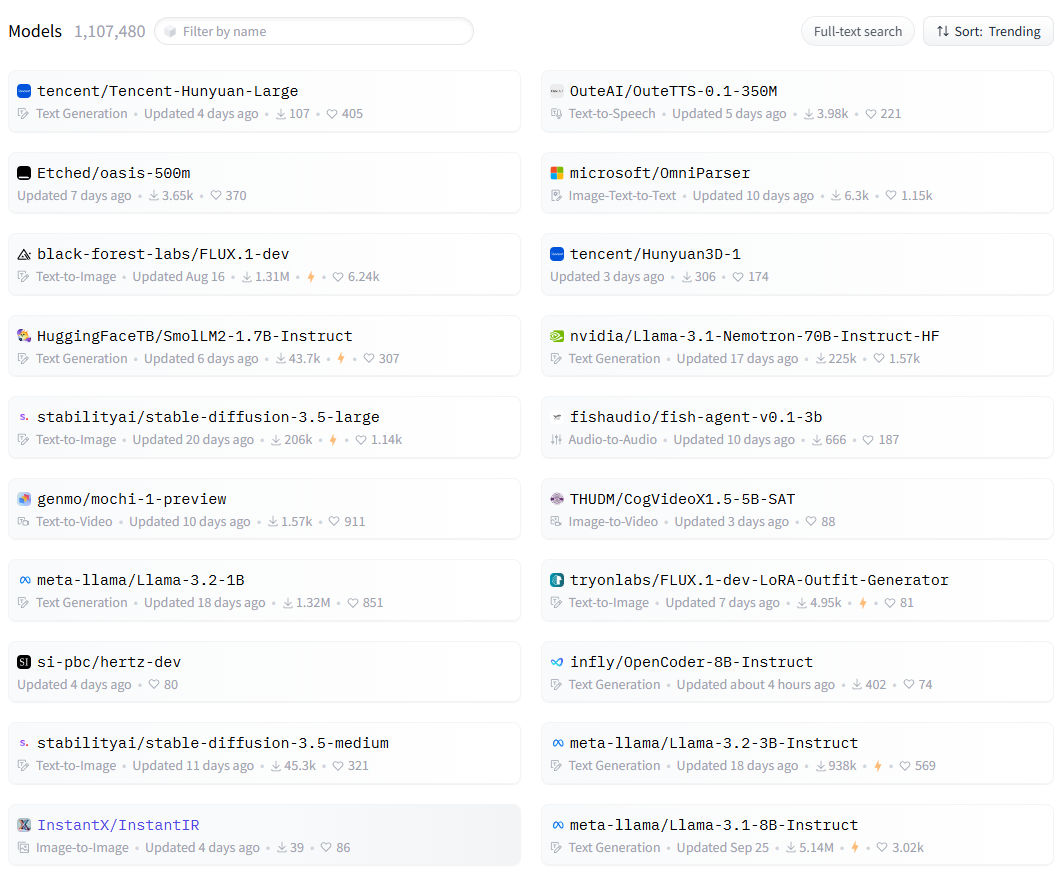

In [209]:
"""
I printed the models that would be the first 20 models on the page to show that they match with the picture above. As you can see the models are in
the correct order.

I've also checked that whilst the models are in order when I collect them, the order changes over the day. Meaning that when I collect the data at
midnight, the order will look different by the afternoon. Roughly, 20% of the models will move out from the first page.

"""

for i in range(0, len(model_list[:20]), 2):
    model_a = model_list[i].id
    model_b = model_list[i + 1].id if i + 1 < len(model_list) else ""  # Handle odd number of models
    print(f"{model_a:<30}                     {model_b}")

tencent/Tencent-Hunyuan-Large                      OuteAI/OuteTTS-0.1-350M
Etched/oasis-500m                                  microsoft/OmniParser
black-forest-labs/FLUX.1-dev                       tencent/Hunyuan3D-1
HuggingFaceTB/SmolLM2-1.7B-Instruct                     nvidia/Llama-3.1-Nemotron-70B-Instruct-HF
stabilityai/stable-diffusion-3.5-large                     fishaudio/fish-agent-v0.1-3b
genmo/mochi-1-preview                              THUDM/CogVideoX1.5-5B-SAT
meta-llama/Llama-3.2-1B                            tryonlabs/FLUX.1-dev-LoRA-Outfit-Generator
si-pbc/hertz-dev                                   infly/OpenCoder-8B-Instruct
stabilityai/stable-diffusion-3.5-medium                     meta-llama/Llama-3.2-3B-Instruct
InstantX/InstantIR                                 meta-llama/Llama-3.1-8B-Instruct


In [ ]:
"""
Creates a list of all the models that are fine-tuned, adapters, quantized or merge's of the base model

Links to different model types:
- Fine tune (https://huggingface.co/docs/transformers/en/training)
- Adapter (https://huggingface.co/docs/hub/en/adapters)
- Quantization (https://huggingface.co/docs/optimum/en/concept_guides/quantization)
- Merge (https://huggingface.co/blog/mlabonne/merge-models#:~:text=Model%20merging%20is%20a%20technique,on%20the%20Open%20LLM%20Leaderboard.) 
"""

# Define the base model ID
base_model_id = "black-forest-labs/FLUX.1-dev"

# # Search for models with the specified base model
model_types = ['finetune', 'adapter', 'quantized', 'merge']
models = api.list_models(filter=f"{model_types[0]}:finetune:{base_model_id}")

model_lst = []

# Display the found models
for i, model in enumerate(models):
    # print(f"Model ID: {model.modelId}")
    model_lst.append(model.modelId)

print(i)

## 1.3 Community discussions
API reference: https://huggingface.co/docs/huggingface_hub/en/guides/community
https://huggingface.co/Shitao/OmniGen-v1/discussions

Each model has a community page in which users can discuss how the model works and provide suggestions. These discussions are accessible through the API. You can extract information on who said what and when.


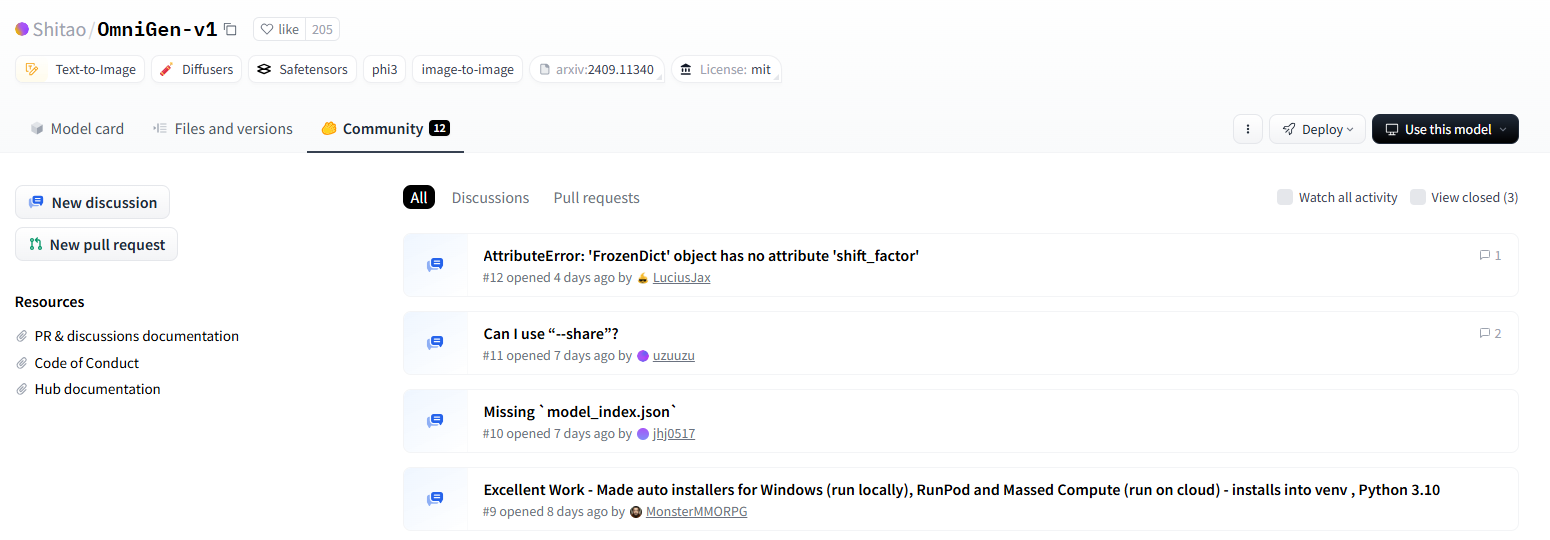


In [14]:
from huggingface_hub import get_repo_discussions
from huggingface_hub import get_discussion_details

In [7]:
# Downloads all the contributions on the Community page
discussions = get_repo_discussions(repo_id="Shitao/OmniGen-v1")

for discussion in discussions:
    print(discussion)

Discussion(title="AttributeError: 'FrozenDict' object has no attribute 'shift_factor'", status='open', num=12, repo_id='Shitao/OmniGen-v1', repo_type='model', author='LuciusJax', is_pull_request=False, created_at=datetime.datetime(2024, 11, 6, 23, 11, 20, tzinfo=datetime.timezone.utc), endpoint='https://huggingface.co')
Discussion(title='Can I use “--share”?', status='open', num=11, repo_id='Shitao/OmniGen-v1', repo_type='model', author='uzuuzu', is_pull_request=False, created_at=datetime.datetime(2024, 11, 3, 15, 26, 55, tzinfo=datetime.timezone.utc), endpoint='https://huggingface.co')
Discussion(title='Missing `model_index.json`', status='open', num=10, repo_id='Shitao/OmniGen-v1', repo_type='model', author='jhj0517', is_pull_request=False, created_at=datetime.datetime(2024, 11, 3, 12, 38, 52, tzinfo=datetime.timezone.utc), endpoint='https://huggingface.co')
Discussion(title='Excellent Work - Made auto installers for Windows (run locally), RunPod and Massed Compute (run on cloud) - i

In [16]:
# Includes details such as what the message was 
get_discussion_details(
    repo_id="Shitao/OmniGen-v1",
    discussion_num=2
)

DiscussionWithDetails(title='Using Inference API', status='open', num=2, repo_id='Shitao/OmniGen-v1', repo_type='model', author='prakashr7d', is_pull_request=False, created_at=datetime.datetime(2024, 10, 23, 17, 28, 34, tzinfo=datetime.timezone.utc), endpoint='https://huggingface.co', events=[DiscussionComment(id='67193242ec92c6d75257c4df', type='comment', created_at=datetime.datetime(2024, 10, 23, 17, 28, 34, tzinfo=datetime.timezone.utc), author='prakashr7d', _event={'id': '67193242ec92c6d75257c4df', 'author': {'avatarUrl': '/avatars/c04c82c45a71e0a9c379f8380901598e.svg', 'fullname': 'prakash ramesh', 'name': 'prakashr7d', 'type': 'user', 'isPro': False, 'isHf': False, 'isMod': False, 'followerCount': 1, 'isOwner': False, 'isOrgMember': False}, 'createdAt': '2024-10-23T17:28:34.000Z', 'type': 'comment', 'data': {'edited': False, 'hidden': False, 'latest': {'raw': 'While using the inference API it is giving me the following error.\r\n\r\n\'{"error":"Model type not found"}\'\r\n', 'htm

## 1.4 Arxiv papers
Some of the studies build on papers that are posted on Arxiv. Arxiv has an API through which we can access at least the **abstract, title and authors' names**.

The authors often have profiles on HuggingFace and you can access these through the paper pages on the website (see below) or the API.
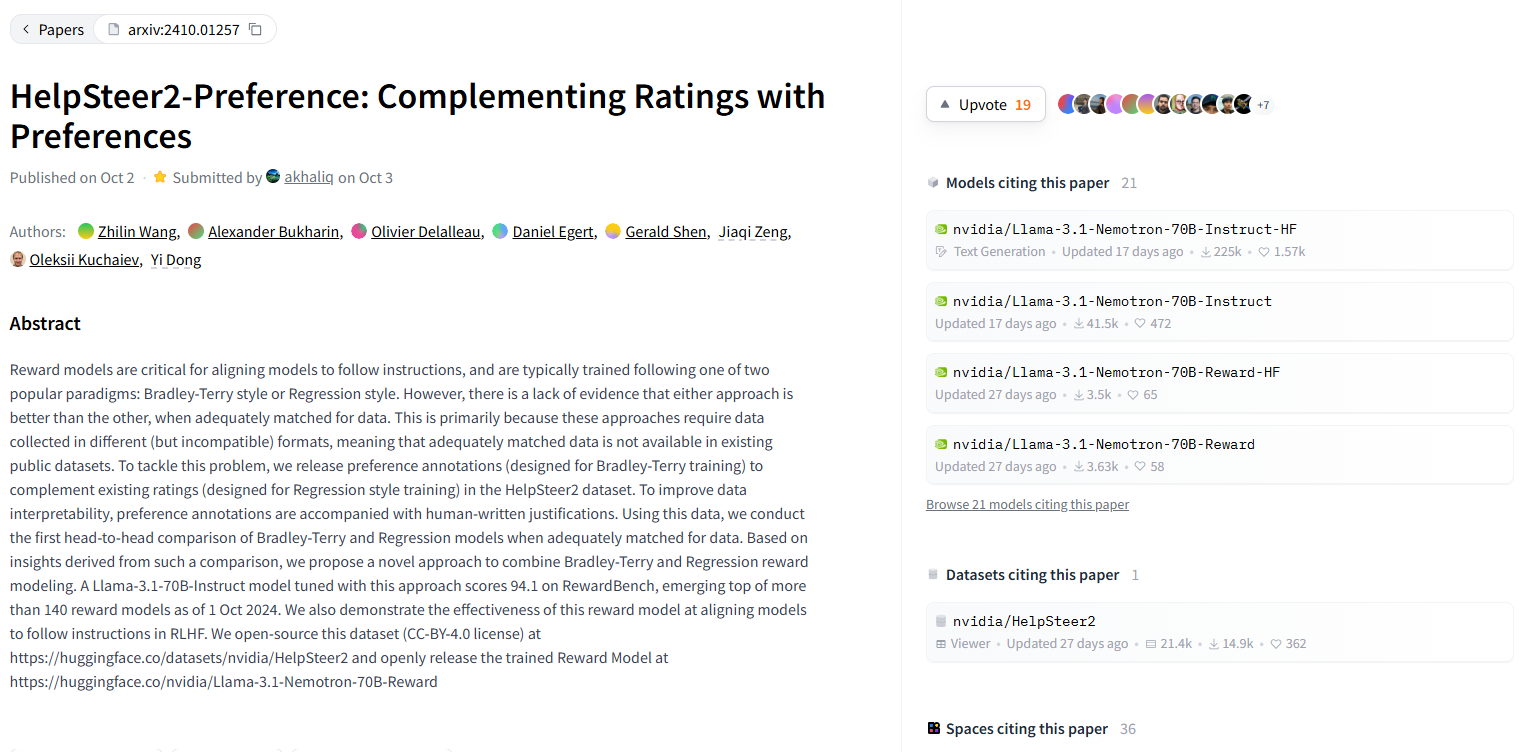

In [ ]:
arxiv_id = "2411.06558"
URL = 'https://huggingface.co/api/papers/{}'.format(arxiv_id)

In [137]:
# !pip install arxiv

import arxiv

# Specify the arXiv ID
arxiv_id = "2403.03206"

# Search for the paper
search = arxiv.Search(id_list=[arxiv_id])
paper = next(search.results())

# Display paper details
print(f"Title: {paper.title}")
print(f"Authors: {', '.join([author.name for author in paper.authors])}")
print(f"Abstract: {paper.summary}")
print(f"PDF URL: {paper.pdf_url}")

C:\Users\Patrick\AppData\Local\Temp\ipykernel_33136\1398820533.py:8: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  paper = next(search.results())


Title: Scaling Rectified Flow Transformers for High-Resolution Image Synthesis
Authors: Patrick Esser, Sumith Kulal, Andreas Blattmann, Rahim Entezari, Jonas Müller, Harry Saini, Yam Levi, Dominik Lorenz, Axel Sauer, Frederic Boesel, Dustin Podell, Tim Dockhorn, Zion English, Kyle Lacey, Alex Goodwin, Yannik Marek, Robin Rombach
Abstract: Diffusion models create data from noise by inverting the forward paths of
data towards noise and have emerged as a powerful generative modeling technique
for high-dimensional, perceptual data such as images and videos. Rectified flow
is a recent generative model formulation that connects data and noise in a
straight line. Despite its better theoretical properties and conceptual
simplicity, it is not yet decisively established as standard practice. In this
work, we improve existing noise sampling techniques for training rectified flow
models by biasing them towards perceptually relevant scales. Through a
large-scale study, we demonstrate the superior p

## 1.5 Commits

We can observe which users are contributing to the code by looking at who has commited code to the dataset. However, I spoke with a senior data scientist and he said that it's a good proxy of who contributed to the project but it will be inaccurate.

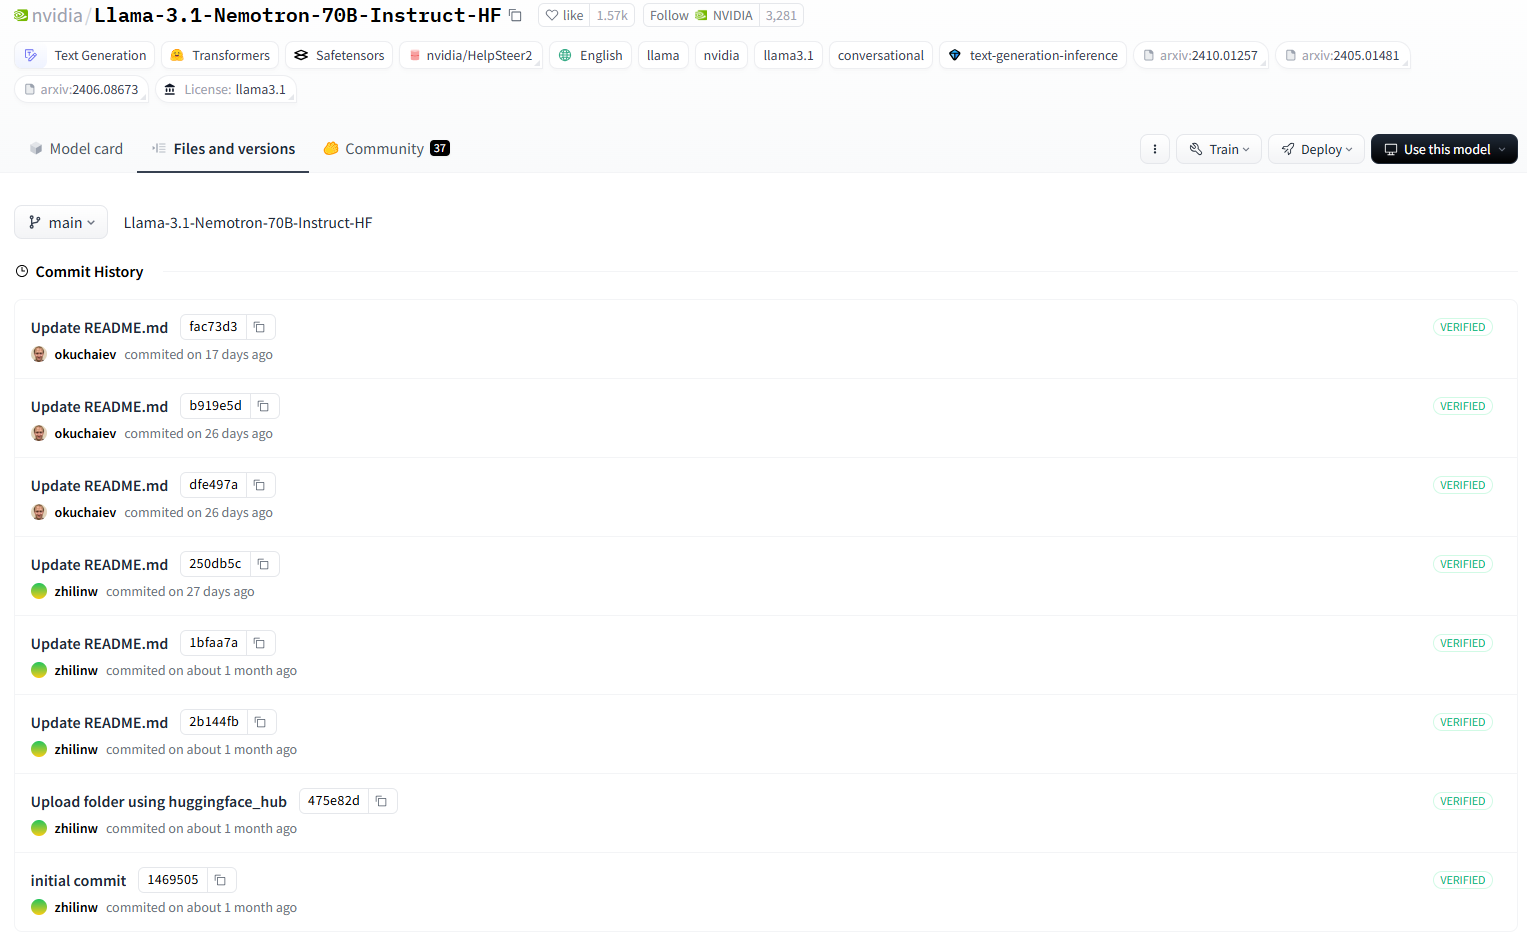

In [175]:
# Specify the repository ID
repo_id = "nvidia/Llama-3.1-Nemotron-70B-Instruct-HF"

# Fetch the commit history of the repository
commits = api.list_repo_commits(repo_id=repo_id)

# Display commit information
for commit in commits:
    print(f"Commit SHA: {commit.commit_id}")
    print(f"Author: {commit.authors}")
    print(f"Date: {commit.created_at}")
    print(f"Message: {commit.title}")
    print("-" * 40)

Commit SHA: fac73d3507320ec1258620423469b4b38f88df6e
Author: ['okuchaiev']
Date: 2024-10-25 04:12:17+00:00
Message: Update README.md
----------------------------------------
Commit SHA: b919e5d07ce15f31ea741f2be99a00a33c3b427b
Author: ['okuchaiev']
Date: 2024-10-16 16:10:53+00:00
Message: Update README.md
----------------------------------------
Commit SHA: dfe497aaf97361b0a815ddb20907da92eca4755e
Author: ['okuchaiev']
Date: 2024-10-16 16:09:49+00:00
Message: Update README.md
----------------------------------------
Commit SHA: 250db5cf2323e04a6d2025a2ca2b94a95c439e88
Author: ['zhilinw']
Date: 2024-10-15 04:31:09+00:00
Message: Update README.md
----------------------------------------
Commit SHA: 1bfaa7ace825a1026a98d2a8ff7553380ce54e4d
Author: ['zhilinw']
Date: 2024-10-12 04:07:26+00:00
Message: Update README.md
----------------------------------------
Commit SHA: 2b144fb5c404575aef345bf86a78ef9c1a611919
Author: ['zhilinw']
Date: 2024-10-12 03:20:43+00:00
Message: Update README.md
---

# 2. User info & Organizations

### Users

User info cannot be easily accessed as you cannot access it through the API. I should be able to collect it using the website.

From the website you can access:
- X account
- GitHub
- Organizations they are part of
- Followers and following
- Contributions on HuggingFace

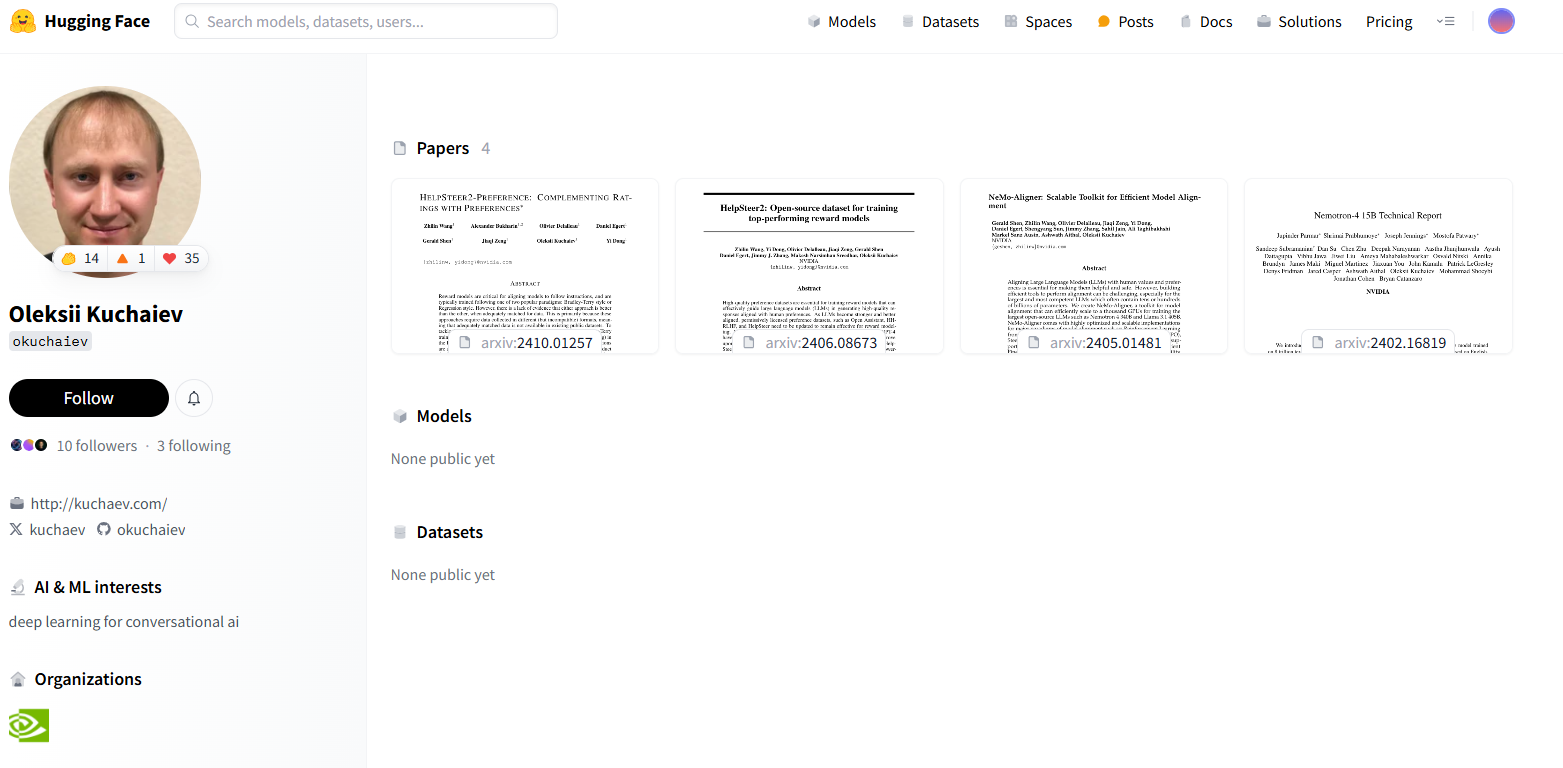

### Organizations

Similarly, information about organizations can only be accessed through the website.

From the website you can access:
- Users that are part of the organization (i.e., team members). Note that the number of users in some organizations is large. This is because the organization is large not because users can freely join organizations. The organization always needs to approve the users (see https://huggingface.co/docs/hub/en/organizations-managing).
- Users following the organization
- Organization's website and GitHub

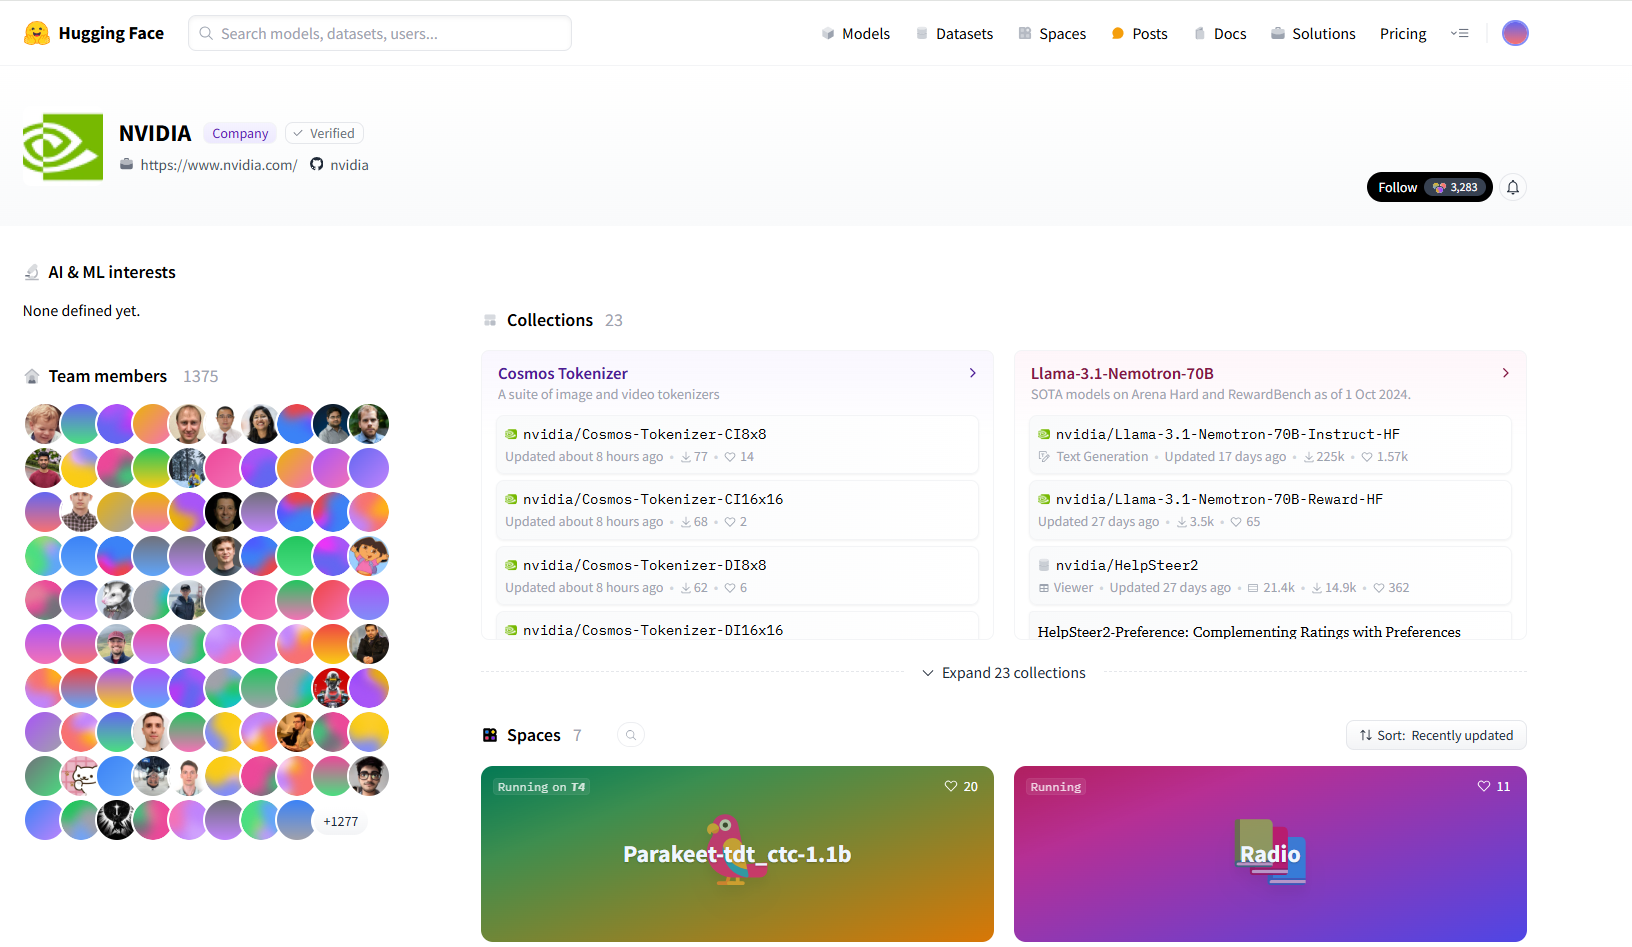

In [ ]:
# Overview

user_name = 'julien-c'
URL = "https://huggingface.co/api/users/{}/overview".format(user_name)

# Likes, includes information on when the likes happened
URL = "https://huggingface.co/api/users/{}/likes".format(user_name)

# Followers, no time stamp
URL = "https://huggingface.co/api/users/{}/followers".format(user_name)

# Following, no time stamp
URL = "https://huggingface.co/api/users/{}/following".format(user_name)

# 3. Datasets

Information you can access about datasets:
- Likes & Downloads
- Organization or user who created it
- General info about tags, libraries, license, and formats

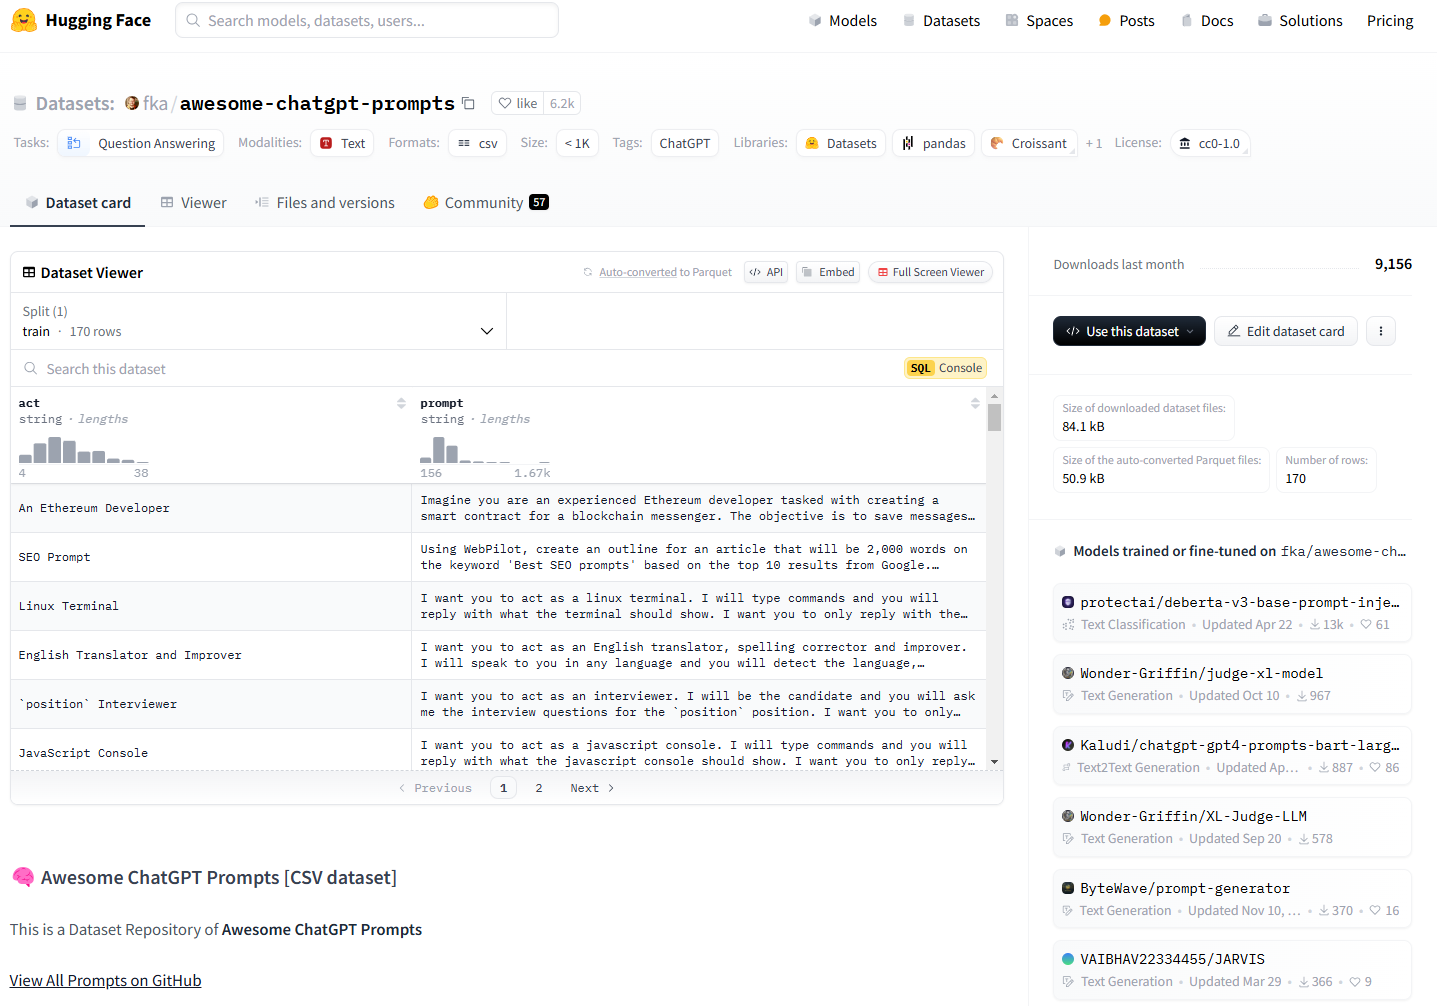



In [212]:
# Fetch datasets associated with the organization
datasets = api.list_datasets()

In [220]:
dataset_lst = []

# Display the found models
for i, dataset in enumerate(datasets):
    # print(f"Model ID: {model.modelId}")
    dataset_lst.append(dataset.id)

print(i)

242307


In [218]:
dataset

DatasetInfo(id='fka/awesome-chatgpt-prompts', author='fka', sha='459a66186f8f83020117b8acc5ff5af69fc95b45', created_at=datetime.datetime(2022, 12, 13, 23, 47, 45, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2024, 9, 3, 21, 28, 41, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=9156, downloads_all_time=None, likes=6197, paperswithcode_id=None, tags=['task_categories:question-answering', 'license:cc0-1.0', 'size_categories:n<1K', 'format:csv', 'modality:text', 'library:datasets', 'library:pandas', 'library:mlcroissant', 'library:polars', 'region:us', 'ChatGPT'], card_data=None, siblings=None)

In [225]:
from huggingface_hub import DatasetCard

card = DatasetCard.load('fka/awesome-chatgpt-prompts')

README.md:   0%|          | 0.00/339 [00:00<?, ?B/s]

C:\Users\Patrick\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Patrick\.cache\huggingface\hub\datasets--fka--awesome-chatgpt-prompts. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [229]:
card.text

'<p align="center"><h1>🧠 Awesome ChatGPT Prompts [CSV dataset]</h1></p>\n\nThis is a Dataset Repository of **Awesome ChatGPT Prompts**\n\n**[View All Prompts on GitHub](https://github.com/f/awesome-chatgpt-prompts)**\n\n# License\n\nCC-0'

In [231]:
card.content

'---\nlicense: cc0-1.0\nsize_categories:\n- 100K<n<1M\ntask_categories:\n- question-answering\ntags:\n- ChatGPT\n---\n<p align="center"><h1>🧠 Awesome ChatGPT Prompts [CSV dataset]</h1></p>\n\nThis is a Dataset Repository of **Awesome ChatGPT Prompts**\n\n**[View All Prompts on GitHub](https://github.com/f/awesome-chatgpt-prompts)**\n\n# License\n\nCC-0'

In [233]:
card.data

{'annotations_creators': None, 'language_creators': None, 'language': None, 'license': 'cc0-1.0', 'multilinguality': None, 'size_categories': ['100K<n<1M'], 'source_datasets': None, 'task_categories': ['question-answering'], 'task_ids': None, 'paperswithcode_id': None, 'pretty_name': None, 'config_names': None, 'train_eval_index': None, 'tags': ['ChatGPT']}

# 4. Spaces

Spaces are usually minimum viable products used to show how a model works. But many of the spaces are also rankings. In general, you cannot access much information about them.

In [237]:
spaces = api.list_spaces()

In [241]:
for space in spaces:
    print(space)
    break

SpaceInfo(id='Kwai-Kolors/Kolors-Virtual-Try-On', author=None, sha=None, created_at=datetime.datetime(2024, 8, 7, 9, 42, 50, tzinfo=datetime.timezone.utc), last_modified=None, private=False, gated=None, disabled=None, host=None, subdomain=None, likes=5039, sdk='gradio', tags=['gradio'], siblings=None, card_data=None, runtime=None, models=None, datasets=None)


In [243]:
from huggingface_hub import SpaceCard

card = SpaceCard.load('Kwai-Kolors/Kolors-Virtual-Try-On')

README.md:   0%|          | 0.00/284 [00:00<?, ?B/s]

C:\Users\Patrick\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Patrick\.cache\huggingface\hub\spaces--Kwai-Kolors--Kolors-Virtual-Try-On. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [245]:
card.data

{'title': 'Kolors Virtual Try-On', 'sdk': 'gradio', 'sdk_version': '4.43.0', 'python_version': None, 'app_file': 'app.py', 'app_port': None, 'license': 'apache-2.0', 'duplicated_from': None, 'models': None, 'datasets': None, 'tags': None, 'emoji': '👕', 'colorFrom': 'purple', 'colorTo': 'gray', 'pinned': True, 'disable_embedding': True}

In [247]:
card.text

'\nCheck out the configuration reference at https://huggingface.co/docs/hub/spaces-config-reference'

In [251]:
# Specify the repository ID
repo_id = "Kwai-Kolors/Kolors-Virtual-Try-On"

# Fetch the commit history of the repository
commits = api.list_repo_commits(repo_id=repo_id, repo_type="space")

# Display commit information
for commit in commits:
    print(f"Commit SHA: {commit.commit_id}")
    print(f"Author: {commit.authors}")
    print(f"Date: {commit.created_at}")
    print(f"Message: {commit.title}")
    print("-" * 40)

Commit SHA: c7354ea19134f6155c30a20853ec7d6d08d8a08b
Author: ['lixiang46']
Date: 2024-09-18 03:57:54+00:00
Message: add en website
----------------------------------------
Commit SHA: 2bdb694bc7dc19cf0c6f0c6684a647aec00023be
Author: ['lixiang46']
Date: 2024-09-18 03:55:37+00:00
Message: add en website
----------------------------------------
Commit SHA: ecf88f5281228913b5ef3f853bf2168a8431461c
Author: ['lixiang46']
Date: 2024-09-10 08:51:06+00:00
Message: add bold
----------------------------------------
Commit SHA: 8149013132fe8e5c42edba3442d687f317aa483d
Author: ['lixiang46']
Date: 2024-09-10 08:42:47+00:00
Message: add bold
----------------------------------------
Commit SHA: 8c986e3350713893c169773c15950eb563b1b801
Author: ['lixiang46']
Date: 2024-09-10 08:31:29+00:00
Message: add bold
----------------------------------------
Commit SHA: e624e326d37027cc3a37b72b2292d485206671f8
Author: ['lixiang46']
Date: 2024-09-10 08:25:46+00:00
Message: add bold
---------------------------------